## 3.17
スパムデータについて、解析

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='white', context='notebook', palette='Set2')

import matplotlib.pyplot as plt
%matplotlib inline

## データの確認
>4601通のメール全てについて、email(0), spam(1)のどちらかのラベル
メール本文中に最も頻出する57種類の単語と句読点記号の相対出現頻度も与えられている

In [3]:
dataset = pd.read_csv("../data/shibata/spambase.data", sep=",", header=None)

In [4]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


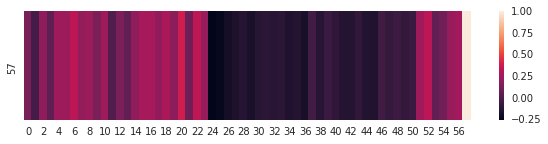

In [5]:
plt.figure(figsize=(10,2))
g= sns.heatmap(dataset.corr().tail(1))

### 次元削減：PCA

In [6]:
# from sklearn.decomposition import PCA

In [7]:
# pca = PCA(n_components=10)
# pca.fit(X)
# X = pd.DataFrame(pca.transform(X))

## モデル

In [24]:
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeCV, LassoCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

random_state = 2

In [12]:
X = dataset.loc[:, 0:56]
y = dataset[57]

In [13]:
# kfold
kfold = StratifiedKFold(n_splits=10)

In [17]:
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(0.1, 1, 30), cv=kfold, shuffle=True)
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), 'o-', label="training scores " + estimator_name, color="r")
    plt.grid()
    plt.plot(training_set_size, test_scores.mean(axis=1), 'o-', label="test scores " + estimator_name, color="g")
    plt.xlabel('Training set size')
    plt.legend(loc='best')

### 分類

/home/itolab/virtualenvs/shibata-env/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/itolab/virtualenvs/shibata-env/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


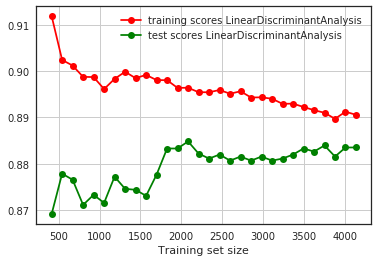

In [18]:
#linear discriminant analysis
plot_learning_curve(LinearDiscriminantAnalysis(), X, y)

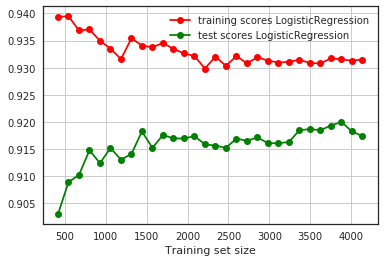

In [21]:
#logistic regression
plot_learning_curve(LogisticRegression(random_state = random_state), X, y)

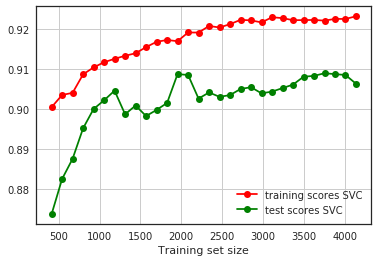

In [25]:
# liner svm
plot_learning_curve(SVC(kernel="linear", C=0.025), X, y)

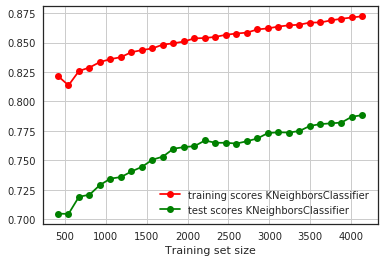

In [23]:
# kneighbors classifier
plot_learning_curve(KNeighborsClassifier(), X, y)